In [34]:
import numpy as np
from matplotlib import pyplot as plt
import os

# Plot
- |u(t)$\mp \sqrt{C}$| if $C>0$ and costant
- |u(t)| otherwise
We make this choice because, in the long time, $u(t)$ must converge to that value (unless C = 0 and it oscillates around that value).

In [35]:
dir_save = "../../.saves/" + "flat Cave = 1 A = 1 T = 10 u0 = 1/" 

In [36]:
u0 = 1

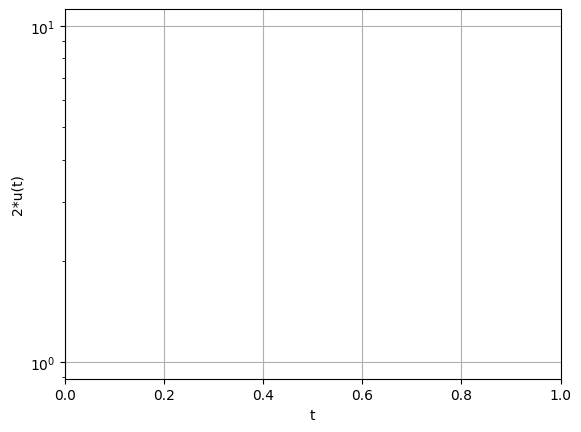

In [37]:
# Create plot object
fig, ax = plt.subplots();
ax.set_xscale("linear")
ax.set_xlabel("t")
ax.set_ylabel("2*u(t)")
ax.set_yscale("log")
ax.grid()


In [38]:
firstt = 0  # First time to plot
lastt = 1000  # Last time to plot

In [39]:
# Get all the simulations in the selected folder
for folder in sorted(os.listdir(dir_save), reverse = True):
    dir = dir_save + folder
    # Get initial value
    f = open(dir + "/fileinit.dat", "r")
    first_line = f.readline().strip('\n')
    second_line = f.readline().strip('\n')
    u0 = float(second_line)
    f.close()
    print(dir)
    # Retrieve evolution parameters
    f = open(dir + "/tdgl_result.dat", "r")
    first_line = f.readline().strip('\n')
    N, tmax, dx, dt, seed, A, Thalf, Cave = first_line.split(" ")
    A = float(A)
    N = int(N)
    dt = float(dt)
    # Get <u(nT)> (SPACE average at times t=nT)
    f = open(dir + "/fileAveout.dat", "r")
    i = 0

    T = 2*float(Thalf)   # Period of C(t)

    veclen = int(float(tmax)/float(dt)) + 1
    tt = np.zeros(veclen)
    uu = np.zeros(veclen)
    for row in f:
        x, y = row.split(" ")
        # Select only times t = nT where T is the period
        tt[i] = float(x)
        uu[i] = float(y)
        if float(A) > 0 and T < 0:
            if uu[0] > 0:
                uu[i] = np.abs(float(y) - np.sqrt(float(A)))    # Plot |u(t) - sqrt(C)| with C = 1
            else:
                uu[i] = np.abs(float(y) + np.sqrt(float(A)))
        else:
            uu[i] = np.abs(float(y))
        i = i + 1
        if tt[i-1] > lastt:
            break
    
    imin = int(float(firstt)/float(dt))
    imax = int(float(lastt)/float(dt))
    label = ""
    label = label + "$u_0 = " + str(u0) + "$"
    #label="dt = " + str(dt) + "; T = " + str(T)
    #label = "dt = " + str(dt) 
    #if float(T) > 0:
    #    label = label + "; T = " + str(T) + "; A = " + str(A)
    #else:
    #    label = label + "; C = " + str(A) + " cost"
    ax.plot(tt[imin:min(i,imax)],2*uu[imin:min(i,imax)],label=label)  # We remove 1/u0^2 to have a power law behaviour from t=0 (otherwise it gets so only when the power law gets more important than the added)
    ax.legend()

../../.saves/flat Cave = 0 A = 1 T = 10 u0 = 1/1709110679499


In [40]:
#dt = 0.008
#ax.axvline(1000)
title = ""
#title = title + "$u_0 = " + str(u0) + "$"
title = title + "\n dt = " + str(round(float(dt),6))
#title = title + "\n$C(t) = A\sin(2\pi t/T)$"
title = title + "\n$C(t)=" + str(round(float(A),2)) + "\sin(2\pi t/" + str(round(T,2)) + ")$"
ax.set_title(title)
ax.set_xscale("log")
#ax.set_title("|u(t)$\mp \sqrt{C}$| if C>0 cost or |u(t)|\n" + "N = " + str(N) + "; dx = " + str(dx) + "\n tspan = " + str(tmax)  + "\n $C(t)=A\sin(2\pi t/T)$ or costant")

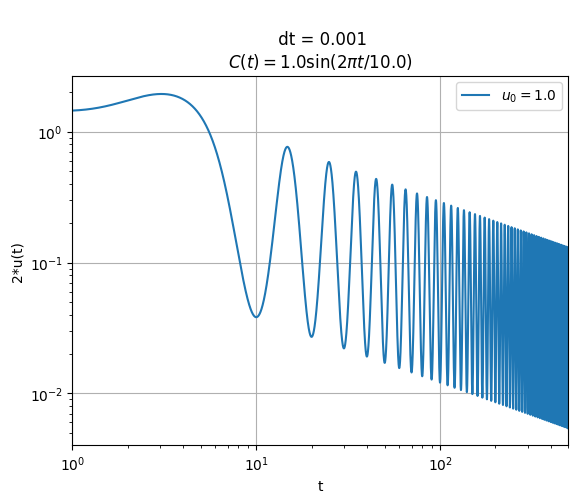

In [41]:
ax.set_xlim(1,500)
fig

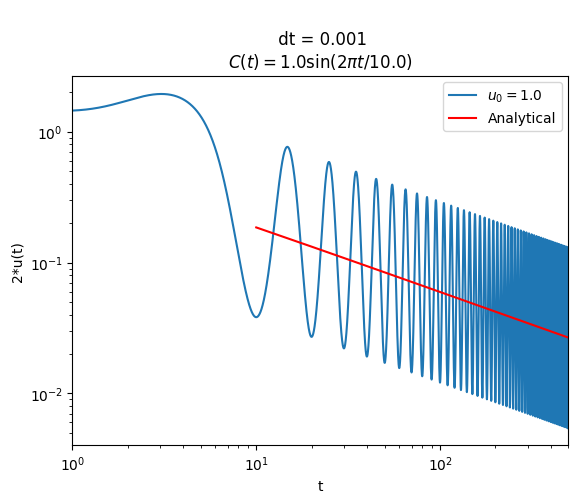

In [42]:
# Add correct curve and Asymptotic curves
# We use the Empirical fact I_0(T) = 2.28T for C(t) sine and 16.844T for cosine


uu = np.zeros(i)
uu_asymp = np.zeros(i)   
nn = np.arange(1,i+1)
I0 = 1.404       # cosine
#I0 = 16.84     # sine
for n in nn:
    uu[n-1] = u0/(np.sqrt(1+2*I0*n*T*u0**2))
    uu_asymp[n-1] = 1/np.sqrt(2*I0*T*n)
# Asymptotic
imax = min(int(i*float(dt)/T),int(lastt/T))
ax.plot(nn[0:imax]*T,uu[0:imax],label="Analytical",color="red")
#ax.plot(nn,uu_asymp,label="Asymptotic",color="blue")

uu_ = np.zeros(veclen)
i = 0
for t in tt:
    uu_[i] = np.exp(2*(1-np.cos(2*np.pi*t)))



#ax.set_xlabel("t")
#ax.set_ylabel("u(t)")
#ax.set_xscale("linear")
#ax.set_yscale("linear")
ax.legend()
ax.grid()

fig

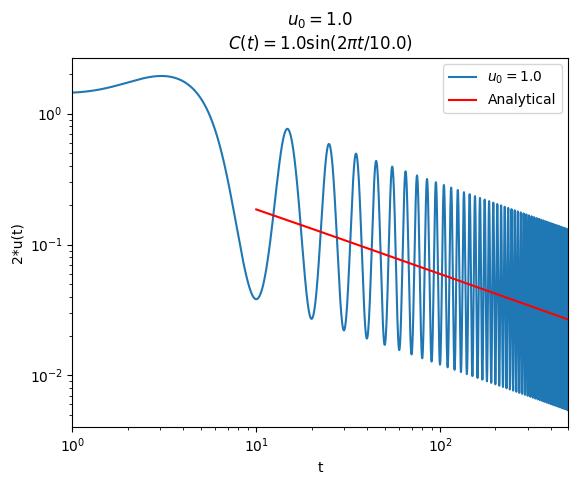

In [43]:
#u0 = 10
ax.set_title("$u_0 = " + str(u0) + "$\n$C(t)=" + str(round(float(A),2)) + "\sin(2\pi t/" + str(round(T,2)) + ")$")
ax.set_xscale("log")
fig

In [44]:
ax.set_title()

TypeError: Axes.set_title() missing 1 required positional argument: 'label'